### Fault Tolerance using Persistence in LangGraph

In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langgraph.checkpoint.memory import InMemorySaver
import time

In [2]:
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str
    step3: str

In [3]:
def run_step1(state: CrashState) -> CrashState:
    print("Step 1 executed")
    return {"step1" : "done", "input" : state["input"]}

def run_step2(state: CrashState) -> CrashState:
    print("Step 2 executing...., Please hang on")
    time.sleep(30)
    return {"step2" : "done"}

def run_step3(state: CrashState) -> CrashState:
    print("Step 3 executed")
    return {"step3" : "done"}

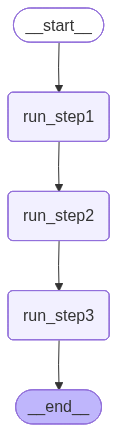

In [4]:
# Creating a checkpointer to save graph states in the memory
checkpointer = InMemorySaver()

# Defining the graph
graph = StateGraph(CrashState)

# Adding nodes to the graph
graph.add_node("run_step1", run_step1)
graph.add_node("run_step2", run_step2)
graph.add_node("run_step3", run_step3)

# Adding edges to the graph
graph.add_edge(START, "run_step1")
graph.add_edge("run_step1", "run_step2")
graph.add_edge("run_step2", "run_step3")
graph.add_edge("run_step3", END)

# Compiling the graph
fault_tolerance_workflow = graph.compile(checkpointer=checkpointer)
fault_tolerance_workflow

In [ ]:
try:
    config = {"configurable" : {"thread_id" : "thread_1"}}
    print("Running Graph: Please manually interrupt during step 2 to simulate Fault Tolerance")
    fault_tolerance_workflow.invoke({"input" : "start"}, config=config)
except KeyboardInterrupt:
    print("Kernel Manually interrupted")

Running Graph: Please manually interrupt during step 2 to simulate Fault Tolerance
Step 1 executed
Step 2 executing...., Please hang on


In [ ]:
fault_tolerance_workflow.get_state(config=config)

In [ ]:
fault_tolerance_workflow.get_state_history(config=config)

#### Running again to show Fault Tolerance
The graph workflow will resume from the step where it was interrupted

In [ ]:
final_state = fault_tolerance_workflow.invoke(None, config=config)
print(f"Final State : {final_state}")

In [ ]:
fault_tolerance_workflow.get_state(config=config)

In [ ]:
fault_tolerance_workflow.get_state_history(config=config)